# workshop on data preprocessing

### Problem

Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

In [1]:
# import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset adult.csv

In [4]:
data = pd.read_csv('adult.csv',header =None)

In [5]:
#shape of the data set

In [6]:
data.shape

(32561, 15)

In [7]:
# first five rows of the data

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
# Last five rows of the data

In [10]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [11]:
# add the column names
#column names ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
#             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
#example for 0th index replace with age

In [12]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data.columns = col_names
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [13]:
# now check the dataframe column names added or not

In [14]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
## Get the summary statistics of the data.

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [17]:
# check the data types and do appropriate conversion

In [18]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [19]:
num_cols=['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
cat_cols=['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']

In [20]:
data[cat_cols] = data[cat_cols].apply(lambda col: col.astype('category'))
data[num_cols] = data[num_cols].apply(lambda col: col.astype('float64'))

In [21]:
data.dtypes

age                float64
workclass         category
fnlwgt             float64
education         category
education_num      float64
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain       float64
capital_loss       float64
hours_per_week     float64
native_country    category
income            category
dtype: object

In [22]:
# check the null values

In [23]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [24]:
#Find the outliers using box plot

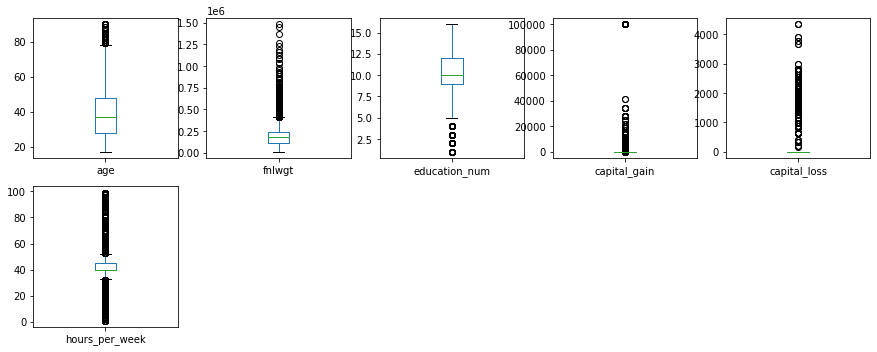

In [25]:
data.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(5,5),figsize=(15,15))
plt.show()

In [26]:
data.shape

(32561, 15)

In [27]:
#remove the outliers use IQR 

In [28]:

Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

#data = data[~((data[num_cols] < (Q1 - 1.5 * IQR)) |(data[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
data.shape

(32561, 15)

In [30]:
upper_bou = (Q3 + 1.5 * IQR)
lower_bou = (Q1 - 1.5 * IQR)

In [31]:
print('Upper Boundary ------------------ \n',upper_bou)
print('lower Boundary ------------------ \n',lower_bou)

Upper Boundary ------------------ 
 age                   78.0
fnlwgt            415887.0
education_num         16.5
capital_gain           0.0
capital_loss           0.0
hours_per_week        52.5
dtype: float64
lower Boundary ------------------ 
 age                  -2.0
fnlwgt           -61009.0
education_num         4.5
capital_gain          0.0
capital_loss          0.0
hours_per_week       32.5
dtype: float64


In [32]:
# for i,j,column in lower_bou,upper_bou,num_cols:
#     data[column]=data[column].clip(i,j)

In [33]:
a=0
b=0
for i in num_cols:
    data[i]=data[i].clip(lower_bou[a],upper_bou[b])
    a+=1
    b+=1

In [34]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,32.5,United-States,<=50K


In [35]:
data.shape

(32561, 15)

In [36]:
# split the dependent and independent variables 

In [37]:
#here target variable is 'income'

In [38]:
X = data.drop("income",axis =1)
y = data['income']
cat_cols.remove('income')

In [39]:
# do encoding for categorical attributes

In [40]:
# Do Train test split train 80%,test 20%

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13456,stratify=y)

In [43]:
# Do scaling for the attributes

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [45]:
X_train.shape

(26048, 14)

Impute Numeric Attributes

In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

In [47]:
impute_num = SimpleImputer(strategy='mean')
impute_num.fit(X_train[num_cols])

X_train_num = pd.DataFrame(impute_num.transform(X_train[num_cols]), columns=num_cols)
X_test_num = pd.DataFrame(impute_num.transform(X_test[num_cols]), columns=num_cols)

In [48]:
impute_cat = SimpleImputer(strategy='most_frequent')
impute_cat.fit(X_train[cat_cols])

X_train_cat = pd.DataFrame(impute_cat.transform(X_train[cat_cols]), columns=cat_cols)
X_test_cat = pd.DataFrame(impute_cat.transform(X_test[cat_cols]), columns=cat_cols)

OneHotEncode Categorial Attributes

In [49]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train_cat)

columns_ohe = list(ohe.get_feature_names(cat_cols))

X_train_cat = ohe.transform(X_train_cat)
X_test_cat = ohe.transform(X_test_cat)

X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

In [50]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [51]:
X_train.shape

(26048, 105)

In [52]:
X_train

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.108595,-1.274141,1.577936,0.0,0.0,1.831103,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.770845,0.521411,-0.455441,0.0,0.0,-0.189438,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.185738,-0.541941,1.171261,0.0,0.0,0.618778,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.653844,0.128920,-2.285481,0.0,0.0,-1.401763,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.948178,-0.919169,1.984612,0.0,0.0,1.831103,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,1.212345,-0.408661,-0.048766,0.0,0.0,1.750282,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26044,-0.480071,0.318993,1.171261,0.0,0.0,-1.401763,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26045,1.433095,-0.720299,-0.455441,0.0,0.0,-0.997655,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26046,-0.332905,-0.020737,-1.268792,0.0,0.0,1.426995,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
X_train.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       ...
       'native_country_ Portugal', 'native_country_ Puerto-Rico',
       'native_country_ Scotland', 'native_country_ South',
       'native_country_ Taiwan', 'native_country_ Thailand',
       'native_country_ Trinadad&Tobago', 'native_country_ United-States',
       'native_country_ Vietnam', 'native_country_ Yugoslavia'],
      dtype='object', length=105)

In [54]:
X_train

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.108595,-1.274141,1.577936,0.0,0.0,1.831103,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.770845,0.521411,-0.455441,0.0,0.0,-0.189438,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.185738,-0.541941,1.171261,0.0,0.0,0.618778,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.653844,0.128920,-2.285481,0.0,0.0,-1.401763,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.948178,-0.919169,1.984612,0.0,0.0,1.831103,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,1.212345,-0.408661,-0.048766,0.0,0.0,1.750282,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26044,-0.480071,0.318993,1.171261,0.0,0.0,-1.401763,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26045,1.433095,-0.720299,-0.455441,0.0,0.0,-0.997655,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26046,-0.332905,-0.020737,-1.268792,0.0,0.0,1.426995,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [56]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [57]:
perceptron_model = Sequential()
perceptron_model.add(Dense(40, input_dim=105, activation='tanh'))
perceptron_model.add(Dense(20, activation='tanh'))
perceptron_model.add(Dense(1, activation='sigmoid'))

In [58]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001,momentum=0.9)

In [59]:
perceptron_model.compile(loss='binary_crossentropy', 
                         optimizer=opt, 
                         metrics=['accuracy'])

In [60]:
perceptron_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                4240      
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,081
Trainable params: 5,081
Non-trainable params: 0
_________________________________________________________________


In [61]:
perceptron_model_history = perceptron_model.fit(X_train, 
                                                y_train, 
                                                epochs=50, 
                                                batch_size=32, 
                                                validation_split=0.2)

Epoch 1/50
652/652 [==============================] - 2s 3ms/step - loss: 0.6636 - accuracy: 0.6110 - val_loss: 0.5657 - val_accuracy: 0.7589
Epoch 2/50
652/652 [==============================] - 1s 2ms/step - loss: 0.5247 - accuracy: 0.7606 - val_loss: 0.4962 - val_accuracy: 0.7653
Epoch 3/50
652/652 [==============================] - 2s 3ms/step - loss: 0.4740 - accuracy: 0.7752 - val_loss: 0.4579 - val_accuracy: 0.7814
Epoch 4/50
652/652 [==============================] - 1s 2ms/step - loss: 0.4431 - accuracy: 0.7921 - val_loss: 0.4331 - val_accuracy: 0.7967
Epoch 5/50
652/652 [==============================] - 2s 2ms/step - loss: 0.4228 - accuracy: 0.8045 - val_loss: 0.4164 - val_accuracy: 0.8050
Epoch 6/50
652/652 [==============================] - 1s 2ms/step - loss: 0.4093 - accuracy: 0.8118 - val_loss: 0.4052 - val_accuracy: 0.8083
Epoch 7/50
652/652 [==============================] - 1s 2ms/step - loss: 0.4000 - accuracy: 0.8156 - val_loss: 0.3974 - val_accuracy: 0.8086
Epoch 

In [73]:
y_train_pred=(perceptron_model.predict(X_train)>0.5).astype('int32')
y_test_pred=(perceptron_model.predict(X_test)>0.5).astype('int32')

In [74]:
confusion_matrix(y_train,y_train_pred)

array([[18173,  1602],
       [ 2796,  3477]], dtype=int64)